In [3]:
from __future__ import annotations

import scanpy as sc
# import decoupler

In [4]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [5]:
adata = sc.read(
    "kang_counts_25k.h5ad", backup_url="https://figshare.com/ndownloader/files/34464122"
)
adata

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36.6M/36.6M [00:01<00:00, 22.5MB/s]
/home/sfernandez/TFG/robustness_informed_TFG/.pixi/envs/default/lib/python3.11/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'label', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [6]:
adata

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'label', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [7]:
# Storing the counts for later use
adata.layers["counts"] = adata.X.copy()
# Renaming label to condition
adata.obs = adata.obs.rename({"label": "condition"}, axis=1)

# Normalizing
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [8]:
# Finding highly variable genes using count data
sc.pp.highly_variable_genes(
    adata, n_top_genes=4000, flavor="seurat_v3", subset=False, layer="counts"
)

In [9]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/sfernandez/TFG/robustness_informed_TFG/.pixi/envs/default/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-03 19:52:04.347072: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-03 19:52:04.347139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-03 19:52:04.349159: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-03 19:52:04.355160: I tensorflow/core/platform/cpu_feature

In [10]:
adata

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'condition', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [11]:
adata.obs["condition"] = (
    adata.obs["condition"]
    .str.replace("ctrl", "control")
    .str.replace("stim", "stimulated")
)

In [12]:
adata.obs.rename(
    columns={"condition": "Estado", "cell_type": "Tipo de célula"}, inplace=True
)
adata.obs["Estado"] = adata.obs["Estado"].str.replace("stimulated", "estimulada")

/home/sfernandez/TFG/robustness_informed_TFG/.pixi/envs/default/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/sfernandez/TFG/robustness_informed_TFG/.pixi/envs/default/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/sfernandez/TFG/robustness_informed_TFG/.pixi/envs/default/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action t

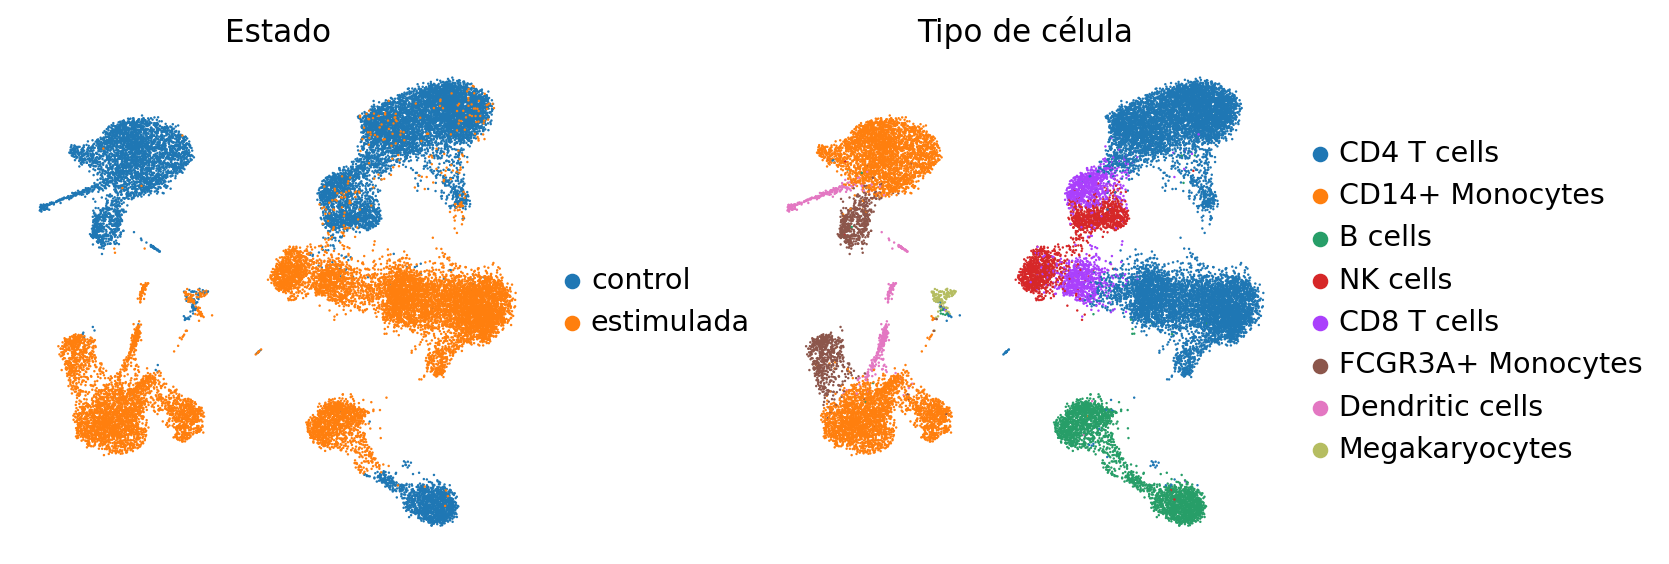

In [13]:
import matplotlib.pyplot as plt

sc.pl.umap(
    adata,
    color=["Estado", "Tipo de célula"],
    frameon=False,
    ncols=2,
    wspace=0.3,
    show=False,
)
plt.savefig(
    "/home/sfernandez/TFG/robustness_informed_TFG/notebooks/results/kang_umap.pdf",
    bbox_inches="tight",
    dpi=300,
)
plt.savefig(
    "/home/sfernandez/TFG/robustness_informed_TFG/notebooks/results/kang_umap.png", dpi=300
)